## Исследование данных о российском кинопрокате



# Описание проекта
Заказчик этого исследования — Министерство культуры Российской Федерации.

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

# Задачи исследования

**Шаг 1. Откройте файлы с данными и объедините их в один датафрейм**
1. Импорт и знакомство с данными
2. Подготовка и объединение данных в рабочий датафрейм

**Шаг 2. Предобработка данных**
1. Проверьте типы данных
2. Изучите пропуски в датафрейме
3. Изучите дубликаты в датафрейме
4. Изучите категориальные значения
5. Проверьте количественные значения
6. Добавьте новые столбцы

**Шаг 3. Проведите исследовательский анализ данных**
1. Посмотрите, сколько фильмов выходило в прокат каждый год. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
2. Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
3. С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.
4. Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**Шаг 4. Исследуйте фильмы, которые получили государственную поддержку**
1. На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Шаг 5. Напишите общий вывод**

## Откройте файлы с данными и объедините их в один датафрейм. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pymystem3 import Mystem 
import numpy as np 

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
movies=pd.read_csv('/datasets/mkrf_movies.csv')
display(movies.head())

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915  2015-11-27T12:00:00.000Z  Художественный   
1  Особо важное задание  111013716  2016-09-13T12:00:00.000Z  Художественный   
2          Особо опасен  221038416  2016-10-10T12:00:00.000Z  Художественный   
3          Особо опасен  221026916  2016-06-10T12:00:00.000Z  Художественный   
4          Особо опасен  221030815  2015-07-29T12:00:00.000Z  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                                NaN   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   

                 age_restriction  refundable_support  nonrefundable_support  \
0    «18+» - запрещено для детей                 nan                    nan   
1  «6+» - для детей старше 6 лет                 nan                    nan   
2    «18+» - запрещено для детей                 nan                    nan   
3    «18+» - запрещено для детей                 nan                    nan   
4    «18+» - запрещено для детей                 nan                    nan   

   budget financing_source ratings                     genres  
0     nan              NaN     7.2     боевик,драма,мелодрама  
1     nan              NaN     6.6              драма,военный  
2     nan              NaN     6.8  фантастика,боевик,триллер  
3     nan              NaN     6.8  фантастика,боевик,триллер  
4     nan              NaN     6.8  фантастика,боевик,триллер

In [4]:
display(movies.tail())

title   puNumber  \
7481     Сад художника: Американский импрессионизм  126008019   
7482                               Звериная ярость  121037819   
7483     Щенячий патруль: Скорей спешим на помощь!  124010819   
7484      Машины песенки. Серия "Испанские мотивы"  124010619   
7485  Машины песенки. Серия "Когда цветут кактусы"  124010719   

               show_start_date             type  \
7481  2019-12-23T12:00:00.000Z           Прочие   
7482  2019-12-24T12:00:00.000Z   Художественный   
7483  2019-12-28T12:00:00.000Z   Художественный   
7484  2019-12-30T12:00:00.000Z     Анимационный   
7485  2019-12-30T12:00:00.000Z     Анимационный   

                                            film_studio  \
7481                               Севен Артс Продакшнз   
7482  Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...   
7483           Никелодеон Анимейшн Студиос, Спин Мастер   
7484           Анимаккорд Лтд., ООО Студия "АНИМАККОРД"   
7485           Анимаккорд Лтд., ООО Студия "АНИМАККОРД"   

           production_country          director  \
7481           Великобритания       Фил Грабски   
7482                      США        Ник Пауэлл   
7483             США - Канада  Чарльз Е.Бастьен   
7484  Республика Кипр, Россия          А.Беляев   
7485  Республика Кипр, Россия          И.Трусов   

                                               producer  \
7481                                        Фил Грабски   
7482  Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...   
7483                                     Дженнифер Додж   
7484                                          Д.Ловейко   
7485                                          Д.Ловейко   

                             age_restriction  refundable_support  \
7481         «12+» - для детей старше 12 лет                 nan   
7482         «16+» - для детей старше 16 лет                 nan   
7483  «0+» - для любой зрительской аудитории                 nan   
7484  «0+» - для любой зрительской аудитории                 nan   
7485  «0+» - для любой зрительской аудитории                 nan   

      nonrefundable_support  budget financing_source ratings           genres  
7481                    nan     nan              NaN     NaN              NaN  
7482                    nan     nan              NaN     5.4   боевик,триллер  
7483                    nan     nan              NaN     NaN              NaN  
7484                    nan     nan              NaN     NaN              NaN  
7485                    nan     nan              NaN     6.3  комедия,вестерн

In [5]:
display(movies.describe().T)

count           mean            std  min           25%  \
refundable_support    332.00  11,864,457.83  24,916,555.26 0.00          0.00   
nonrefundable_support 332.00  48,980,988.89  59,980,117.92 0.00 25,000,000.00   
budget                332.00 127,229,716.68 188,588,333.12 0.00 42,000,000.00   

                                50%            75%              max  
refundable_support             0.00  15,000,000.00   180,000,000.00  
nonrefundable_support 30,000,000.00  40,375,000.00   400,000,000.00  
budget                68,649,916.00 141,985,319.50 2,305,074,303.00

In [6]:
movies.info(memory_usage='deep') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 9.2 MB


Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

1. title — название фильма;
2. puNumber — номер прокатного удостоверения;
3. show_start_date — дата премьеры фильма;
4. type — тип фильма;
5. film_studio — студия-производитель;
6. production_country — страна-производитель;
7. director — режиссёр;
8. producer — продюсер;
9. age_restriction — возрастная категория;
10. refundable_support — объём возвратных средств государственной поддержки;
11. nonrefundable_support — объём невозвратных средств государственной поддержки;
12. financing_source — источник государственного финансирования;
13. budget — общий бюджет фильма;
14. ratings — рейтинг фильма на КиноПоиске;
15. genres — жанр фильма.

In [7]:
shows=pd.read_csv('/datasets/mkrf_shows.csv')
display(shows.head())

puNumber     box_office
0  111000113       2,450.00
1  111000115      61,040.00
2  111000116 153,030,013.40
3  111000117  12,260,956.00
4  111000118 163,684,057.79

In [8]:
shows.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
1. puNumber — номер прокатного удостоверения;
2. box_office — сборы в рублях.

Изучив столбец puNumber мы обнаружили, что в датафрейме movies он имеет тип object - имеет пробелы перед или после значения, а также записи 'нет'. 

In [9]:
def no_search(x):
    '''Функция возвращает 0, если в строке с номером прокатного удостверения значение "нет"'''
    if x=='нет':
        return 0
    else:
        return x
movies.loc[:,'puNumber'] = movies.loc[:,'puNumber'].map(lambda x: no_search(x))

In [10]:
# Заполним пропущенные значения нулями, и изменим тип данных на int32
movies['puNumber']=movies['puNumber'].str.strip()
movies['puNumber']=movies['puNumber'].fillna(0)
movies['puNumber']=movies['puNumber'].astype('int32')

In [11]:
# Объединим данный в один датафрейм по столбцу puNumber
df=movies.merge(shows, on='puNumber', how='left')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null int32
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), int32(1), object(11)
memory usage: 8.9 MB


### Вывод

Мы изучили данные, подготовили их к объединению, и получили один рабочий датафрейм.

Предварительно можно утверждать, что, данных достаточно для ответа на поставленные вопросы. Но встречаются пропуски в данных, а в некоторых столбцах встречаются аномальные значения.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

##  Предобработка данных

### Проверьте типы данных

In [12]:
# Изменим формат времени
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

Типы данных других столбцов мы будем изменять далее по мере их исследования.

### Изучите пропуски в датафрейме

In [13]:
# Заполним пропуски на unknown и изменим тип данных.
df['producer']=df['producer'].fillna('unknown').astype('category')
df['director']=df['director'].fillna('unknown').astype('category')
df['film_studio']=df['film_studio'].fillna('unknown').astype('category')
df['genres']=df['genres'].fillna('unknown').astype('category')

In [14]:
# Пропущенные значения столбцов с гос.поддержкой заменим на 0.
df['refundable_support']=df['refundable_support'].fillna(0)
df['nonrefundable_support']=df['nonrefundable_support'].fillna(0)

In [15]:
# Обработаем столбец с данными о возрастном рейтинге и оставим только число с возрастном 
df['age_restriction'] = df['age_restriction'].map(lambda x: x[0: x.find('+')] if '+' in x else x)
df['age_restriction'] = df['age_restriction'].str[1:]
df['age_restriction'] = df['age_restriction'].fillna(-1)
df['age_restriction'] = df['age_restriction'].astype('int')

### Изучите дубликаты в датафрейме

In [16]:
df['title'].value_counts()

День святого Валентина_                                                      5
Непокоренный.                                                                4
Красавчик-2                                                                  4
Прощание                                                                     4
Жена путешественника во времени                                              4
                                                                            ..
Счастливчик _                                                                1
Нация убийц                                                                  1
Сборник короткометражных фильмов ужасов                                      1
Машкины Cтрашилки. Серия "Приводящая в трепет сага о велосипеде-призраке"    1
Фиксики (серия "Анализ крови")                                               1
Name: title, Length: 6772, dtype: int64

In [17]:
display(df.query('title== "День святого Валентина_" '))

title   puNumber           show_start_date  \
3902  День святого Валентина_  221083810 2010-07-15 12:00:00+00:00   
3991  День святого Валентина_  221068010 2010-05-14 12:00:00+00:00   
4070  День святого Валентина_  121002210 2010-02-03 12:00:00+00:00   
4196  День святого Валентина_  221136210 2010-11-30 12:00:00+00:00   
5070  День святого Валентина_  221066410 2010-06-01 12:00:00+00:00   

                type                                        film_studio  \
3902  Художественный  Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...   
3991  Художественный  Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...   
4070  Художественный  Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...   
4196  Художественный  Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...   
5070  Художественный  Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...   

     production_country       director         producer  age_restriction  \
3902                США  Гарри Маршалл  Сэмюэл Дж.Браун               16   
3991                США  Гарри Маршалл  Сэмюэл Дж.Браун               16   
4070                США  Гарри Маршалл  Сэмюэл Дж.Браун               16   
4196                США  Гарри Маршалл  Сэмюэл Дж.Браун               16   
5070                США  Гарри Маршалл  Сэмюэл Дж.Браун               16   

      refundable_support  nonrefundable_support  budget financing_source  \
3902                0.00                   0.00     nan              NaN   
3991                0.00                   0.00     nan              NaN   
4070                0.00                   0.00     nan              NaN   
4196                0.00                   0.00     nan              NaN   
5070                0.00                   0.00     nan              NaN   

     ratings             genres  box_office  
3902     6.7  мелодрама,комедия         nan  
3991     6.7  мелодрама,комедия         nan  
4070     6.7  мелодрама,комедия         nan  
4196     6.7  мелодрама,комедия         nan  
5070     6.7  мелодрама,комедия         nan

Один и тот же фильм, имеет разные номера прокатного удостверения и разные даты начала проката. Это может быть связано с различными прокатными зонами.

### Изучите категориальные значения

In [18]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Значения этого столбца имеют пробелы в начале или в конце, нужно от них избавиться

In [19]:
df['type']=df['type'].str.strip()

### Проверьте количественные значения

In [20]:
# Посмотрим, есть ли данные, в которых размер поддержки превышает общий бюджет фильма
display(df.query('(refundable_support > budget) or (nonrefundable_support > budget)').head())

title   puNumber           show_start_date  \
2053                  14+  111023614 2014-12-19 12:00:00+00:00   
2058            Дуxless 2  111000415 2015-01-26 12:00:00+00:00   
2472          Воин (2015)  111017315 2015-09-28 12:00:00+00:00   
2532              Бармен.  111009615 2015-05-26 12:00:00+00:00   
2615  Савва. Сердце воина  114001715 2015-07-21 12:00:00+00:00   

                type                                        film_studio  \
2053  Художественный                         ООО Киностудия  "Сентябрь"   
2058  Художественный  ООО "Киностудия "Слово", ООО "Арт Пикчерс Студия"   
2472  Художественный   ООО "Форпост Продакшн", ООО "Арт Пикчерс Студия"   
2532  Художественный          АО "ВайТ Медиа", ООО "Арт Пикчерс Студия"   
2615    Анимационный   ООО "Глюкоза Продакшн", ООО "Арт Пикчерс Студия"   

     production_country      director                            producer  \
2053             Россия      А.Зайцев                 О.Гранина, А.Зайцев   
2058             Россия    Р.Прыгунов  П.Ануров, Ф.Бондарчук, Д.Рудовский   
2472             Россия   А.Андрианов            ООО "Арт Пикчерс Студия"   
2532             Россия  Д.Штурманова                         Т.Вайнштейн   
2615             Россия      М.Фадеев                          А.Чистяков   

      age_restriction  refundable_support  nonrefundable_support  budget  \
2053               16                0.00          23,000,000.00    0.00   
2058               16                0.00          75,000,000.00    0.00   
2472               12       10,000,000.00          70,000,000.00    0.00   
2532               16       20,000,000.00                   0.00    0.00   
2615                6       60,000,000.00         100,000,000.00    0.00   

                      financing_source ratings  \
2053  Министерство культуры, Фонд кино     6.6   
2058                         Фонд кино     6.6   
2472                         Фонд кино     7.8   
2532                         Фонд кино     6.2   
2615                         Фонд кино     4.6   

                              genres     box_office  
2053                       мелодрама  10,234,016.10  
2058                           драма 446,163,511.00  
2472           боевик,драма,криминал 196,572,438.40  
2532                 комедия,фэнтези  67,418,974.80  
2615  мультфильм,приключения,фэнтези 184,487,551.40

In [21]:
# Для данных, у которых бюджет неизвестен заполним пропуски суммой оказываемой поддеркжи
df['budget']=df['budget'].fillna(df['refundable_support']+df['nonrefundable_support'])

In [22]:
# Напишем функцию, с помощью которой по возможности избавимся от нулевых значений в поле бюджета
def zero_budget(budget, refund, nonrefund):
    '''Функция возвращает сумму поддержки, если бюджет равен 0'''
    if budget == 0:
        return refund + nonrefund
    else:
        return budget
df['budget'] = df.apply(lambda x: zero_budget(x.budget, x.refundable_support, x.nonrefundable_support), axis=1)

In [23]:
# Изучим рейтинги фильмов
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что в столбце ratings есть значения в разных форматах, также мы видим, что присутствуют пропуски

In [24]:
# Избавимся от процентов и приведем рейтинги к значениям по десятибальной шкале, а также изменим тип на float
def ratings(x):
    a = x.split('%')[0]
    return a
def ratings_1(x):
    if x>10:
        a=x/10
        return a
    else: return x
    
df['ratings']=df['ratings'].astype('str')    
df.loc[:,'ratings'] = df.loc[:,'ratings'].map(lambda x: ratings(x))
df['ratings']=df['ratings'].fillna(-1)
df['ratings']=df['ratings'].astype('float')
df.loc[:,'ratings'] = df.loc[:,'ratings'].map(lambda x: ratings_1(x))

In [25]:
# Пропущенные значения заполним -1, для того, чтобы мы могли их видеть в дальнейших исследованиях
df['ratings']=df['ratings'].fillna(-1)
df['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4, -1. ,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4,  9.9,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9,  2.8,  3.7,  1.4,  3.1,  9.7,  3.5,
        3.2,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6,  9.1,  9.4,  9. ,
        1.9,  1. ,  8.9,  1.3,  1.8,  1.2,  1.7,  9.8])

### Добавьте новые столбцы

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [26]:
df['start_year']=df['show_start_date'].dt.year

In [27]:
df['genres'].unique()

[боевик,драма,мелодрама, драма,военный, фантастика,боевик,триллер, драма, мелодрама,комедия, ..., боевик,драма,триллер, документальный,военный,драма, драма,криминал,фильм-нуар, мультфильм,детский,приключения, мелодрама,история,драма]
Length: 743
Categories (743, object): [боевик,драма,мелодрама, драма,военный, фантастика,боевик,триллер, драма, ..., документальный,военный,драма, драма,криминал,фильм-нуар, мультфильм,детский,приключения, мелодрама,история,драма]

Создим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


In [28]:
def first_element(x):
    '''Функция возвращает первое значение перед знаком "," '''
    a=x.split(",")[0]
    return a

df['main_genre'] = df['genres'].map(lambda x: first_element(x))

In [29]:
df['main_director']=df['director'].map(lambda x: first_element(x))

In [30]:
display(df.head())

title   puNumber           show_start_date            type  \
0      Открытый простор  221048915 2015-11-27 12:00:00+00:00  Художественный   
1  Особо важное задание  111013716 2016-09-13 12:00:00+00:00  Художественный   
2          Особо опасен  221038416 2016-10-10 12:00:00+00:00  Художественный   
3          Особо опасен  221026916 2016-06-10 12:00:00+00:00  Художественный   
4          Особо опасен  221030815 2015-07-29 12:00:00+00:00  Художественный   

                                         film_studio production_country  \
0  Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...                США   
1                              Киностудия "Мосфильм"               СССР   
2  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
3  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   
4  Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...                США   

            director                                           producer  \
0      Кевин Костнер          Дэвид Валдес, Кевин Костнер, Джейк Эбертс   
1          Е.Матвеев                                            unknown   
2  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
3  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   
4  Тимур Бекмамбетов  Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит   

   age_restriction  refundable_support  nonrefundable_support  budget  \
0               18                0.00                   0.00    0.00   
1                6                0.00                   0.00    0.00   
2               18                0.00                   0.00    0.00   
3               18                0.00                   0.00    0.00   
4               18                0.00                   0.00    0.00   

  financing_source  ratings                     genres  box_office  \
0              NaN     7.20     боевик,драма,мелодрама         nan   
1              NaN     6.60              драма,военный         nan   
2              NaN     6.80  фантастика,боевик,триллер         nan   
3              NaN     6.80  фантастика,боевик,триллер         nan   
4              NaN     6.80  фантастика,боевик,триллер         nan   

   start_year  main_genre      main_director  
0        2015      боевик      Кевин Костнер  
1        2016       драма          Е.Матвеев  
2        2016  фантастика  Тимур Бекмамбетов  
3        2016  фантастика  Тимур Бекмамбетов  
4        2015  фантастика  Тимур Бекмамбетов

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

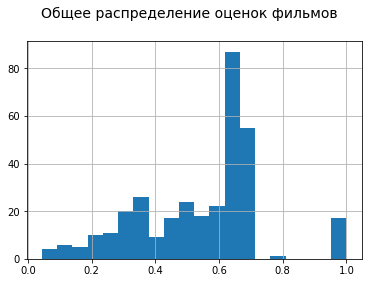

In [31]:
df['support_ratio']=(df['refundable_support']+df['nonrefundable_support'])/df['budget']
df['support_ratio'].hist(bins=20)
plt.suptitle('Общее распределение оценок фильмов', size=14, y=1.0); 
plt.show()

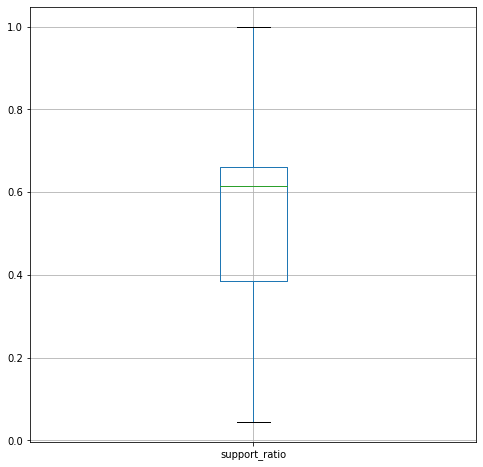

In [32]:
df.boxplot('support_ratio', figsize=(8,8))
plt.show()

Видим, что для большей части фильмов размер поддержки составляет от 0.4 до 0.6 от общего бюджета фильма.

### Выводы
1. Проверили количество значений и типы данных в датафрейме
2. Изучили пропуски в датафрейме и заполнили их.
3. Изучили дубликаты в датафрейме
4. Изучили категориальные значения и исправили данные с пробелами
5. Проверили количественные значения, исправили данные в столбце budget, а также привели значения оценок из столбца ratings к общему виду
6. Добавили новые столбцы
7. Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка - для большей части фильмов размер поддержки составляет от 0.4 до 0.6 от общего бюджета фильма.

## Проведите исследовательский анализ данных

Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

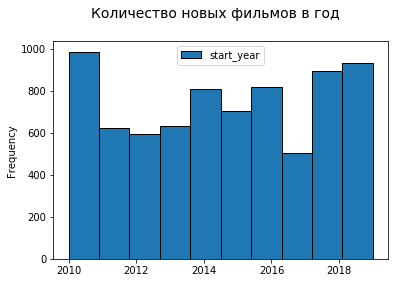

In [33]:
df['start_year'].plot(kind='hist', bins=10, ec='black').legend()
plt.suptitle('Количество новых фильмов в год', size=14, y=1.0); 
plt.show()

In [34]:
df.start_year.value_counts().sort_index(ascending=False)

2019    930
2018    891
2017    505
2016    818
2015    705
2014    807
2013    630
2012    593
2011    622
2010    985
Name: start_year, dtype: int64

На графике заметен провал по количеству фильмов в прокате в 2017 году

In [35]:
print(f"Доля фильмов с указанной информацией о прокате составляет: {(df[df['box_office']>0]['box_office'].describe()[0]/df['title'].describe()[0].astype('int')*100).astype('int')}%")

Доля фильмов с указанной информацией о прокате составляет: 41%


Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [36]:
box_office = df.groupby(['start_year']).agg({'box_office': 'sum'})
display(box_office)

box_office
start_year                  
2010            2,428,654.00
2011           14,102,765.00
2012            6,955,423.00
2013           29,799,706.20
2014        7,444,951,859.20
2015       39,497,365,196.40
2016       47,866,299,741.91
2017       48,563,707,217.51
2018       49,668,403,134.32
2019       48,425,708,779.59

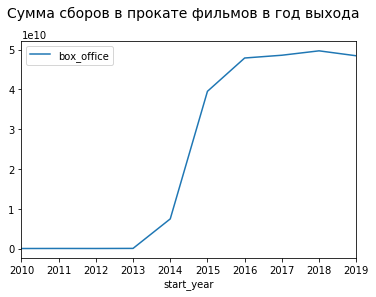

In [37]:
box_office.plot()
plt.suptitle('Cумма сборов в прокате фильмов в год выхода', size=14, y=1.0);    
plt.show()

Максимальная сумма сборов пришлась на 2018 год, минимальная - на 2010. 

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [38]:
df.pivot_table(index='start_year', values='box_office', aggfunc=['mean','median'])

mean       median
               box_office   box_office
start_year                            
2010            23,130.04     1,700.00
2011           129,383.17     3,000.00
2012            54,339.24     5,660.00
2013           161,954.92     3,522.50
2014        26,684,415.27    18,160.00
2015        84,940,570.31 4,920,933.00
2016        91,000,569.85 3,846,679.41
2017       136,032,793.33 9,968,340.00
2018       104,565,059.23 8,891,102.21
2019        91,369,261.85 4,627,798.34

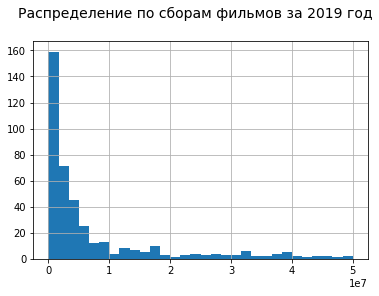

In [39]:
df.query('start_year==2019')['box_office'].hist(bins=30, range=(0, 50000000))
plt.suptitle('Распределение по сборам фильмов за 2019 год', size=14, y=1.0); 
plt.show()

На примере фильмов, вышедших за 2019 год, большая разница между средними и медианными значениями объясняется большим количеством фильмов со сборами менее 5 млн.руб. Чтобы убедиться, что с этими фильмами все в порядке, посмотрим на выборку из датафрейма

In [40]:
display(df.query('(box_office<5000000) and (start_year==2019)').head())

title   puNumber           show_start_date  \
6262      СКВОЗЬ ЧЕРНОЕ СТЕКЛО  111018418 2019-03-20 12:00:00+00:00   
6424             Романтики 303  121026018 2019-01-17 12:00:00+00:00   
6458  Зубы, писать и в постель  121027418 2019-01-31 12:00:00+00:00   
6477          Интервью с Богом  121028018 2019-01-17 12:00:00+00:00   
6479      Тайна семьи монстров  124004718 2019-01-10 12:00:00+00:00   

                type                                        film_studio  \
6262  Художественный                                ООО "Пролайн-медиа"   
6424  Художественный  Кахуна Филм, Нэусупер, Стархаус Продуционе, Гл...   
6458  Художественный  Си Джи Синема, Эс Эн Дэ Фильм, Эм 6 Фильм, Коф...   
6477  Художественный       Эстет Филмз, Биг Индиа Пикчерз, Гивинг Филмз   
6479    Анимационный    Анима Эстудиос, Дискрит Артс Продакшнз, Эфисайн   

     production_country           director  \
6262             Россия      К.Лопушанский   
6424           Германия   Ганс Вайнгартнер   
6458            Франция  Эммануэль Жилибер   
6477                США         Перри Лэнг   
6479    Индия - Мексика   Леопольдо Агиляр   

                                               producer  age_restriction  \
6262                                            А.Сигле               18   
6424                  Ганс Вайнгартнер, Саймон Амбергер               16   
6458          Оливье Грумбах, Шарль Жилибер, Лойк Флери               18   
6477            Кен Агуадо, Фред Бернштейн, Рик Джексон               16   
6479  Алекс Гарсиа, Фернандо Де Фуэнтес, Хосе С. Гар...                6   

      refundable_support  nonrefundable_support  budget financing_source  \
6262                0.00                   0.00    0.00              NaN   
6424                0.00                   0.00    0.00              NaN   
6458                0.00                   0.00    0.00              NaN   
6477                0.00                   0.00    0.00              NaN   
6479                0.00                   0.00    0.00              NaN   

      ratings                      genres   box_office  start_year  \
6262     6.30                       драма   438,755.50        2019   
6424     7.40                   мелодрама 2,236,562.00        2019   
6458     5.90                     комедия 1,074,815.00        2019   
6477     6.00              драма,детектив 1,545,358.03        2019   
6479     5.10  мультфильм,фэнтези,комедия 3,377,378.97        2019   

      main_genre      main_director  support_ratio  
6262       драма      К.Лопушанский            nan  
6424   мелодрама   Ганс Вайнгартнер            nan  
6458     комедия  Эммануэль Жилибер            nan  
6477       драма         Перри Лэнг            nan  
6479  мультфильм   Леопольдо Агиляр            nan

С данными все в порядке, можем приступать к следующему заданию.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Ответим на вопрос: "Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано."

In [41]:
# Определим сумму сборов за весь период для фильмов из каждой возрастной группы
def age_box_office(df):
    return (
        df
            .query('age_restriction != 0')
            .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
            
    )
def age_box_office_plot(df):
    (
        df
            .plot(kind='barh', figsize=(10, 5), ec='black')
            .set(xlabel='box_office', ylabel='age_restriction')
    )
    plt.suptitle('Сборы фильмов распределенных по возрастному рейтингу', size=14, y=1);
    plt.show()

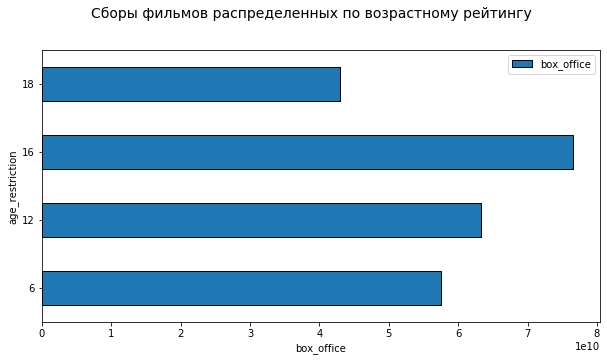

In [42]:
age_box_office_plot(age_box_office(df))

Видим, что больше всего собирают фильмы с возрастным ограничением 16+

Посмотрим, как выглядит картина, если добавим распределение по годам. 

In [43]:
age=['6','12','16','18']

In [44]:
def age_box_office_by_year(age, df):
    return (
        df
            .query("age_restriction == @age")
            .pivot_table(index='start_year', values='box_office', aggfunc='sum')
            
    )


Фильмы с возрастным рейтингом 6+ собрали 57 млрд.руб.

Фильмы с возрастным рейтингом 12+ собрали 63 млрд.руб.

Фильмы с возрастным рейтингом 16+ собрали 76 млрд.руб.

Фильмы с возрастным рейтингом 18+ собрали 42 млрд.руб.


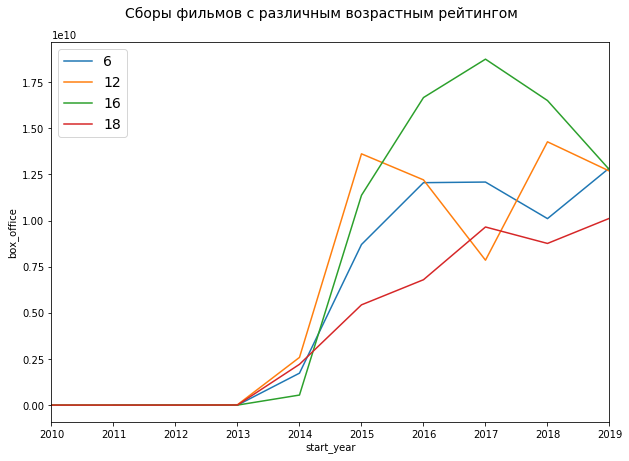

In [45]:
for item in age:
    age_box_office_by_year(item, df)['box_office'].plot(figsize=(10, 7), label=item)
    plt.xlabel("start_year")
    plt.ylabel("box_office")
    plt.legend(prop={'size': 14})
    print()
    print(f"Фильмы с возрастным рейтингом {item}+ собрали {(age_box_office_by_year(item, df).sum()[0]/1000000000).astype('int')} млрд.руб.")
plt.suptitle('Сборы фильмов с различным возрастным рейтингом', size=14, y=0.95);     

- Из графика видно, что каждый год по сборам лидируют фильмы с возрастным ограничением 16+.
- Для фильмов 16+ и 18+ видим рост по сборам и пик в 2017 году, в то время как фильмы 12+ в 2017 году имеют значительный провал по отношению к другим возрастным категориям.
- За весь период больше всего собрали фильмы с возрастным рейтингом 16+ - 76 млрд.руб, меньше всего - фильмы с возрастным рейтингом 18+ - 42 млрд.руб.

Наименее выгодны показы с возрастным ограничием 18+, скорее всего связано с невозможностью допуска к просмотру лиц не достигших 18 лет, в то время, как, например, на фильмы 12+ возможен допуск детей 6+ в присутствии родителей. 

Провал 2017 года фильмов с рейтингом 12+ связан, скорее всего, с малым количеством фильмов с данным рейтингом. 


## Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Выделим датафрейм с ненулевой гос.поддержкой, и посмотрим на график сборов и бюджета в каждый год с 2014 по 2019

In [46]:
rus_film = df.query('(refundable_support > 0) or (nonrefundable_support > 0)')

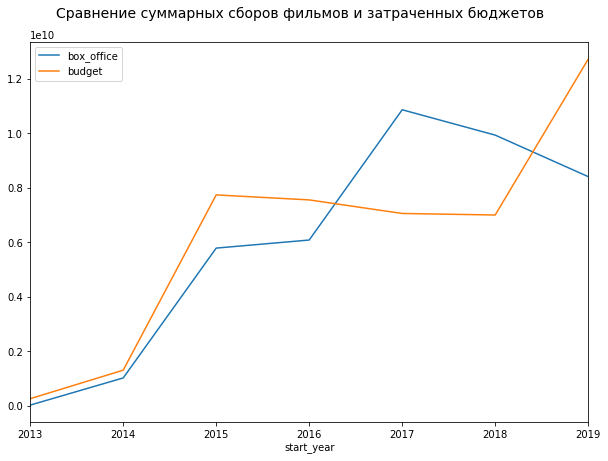

In [47]:
fig, ax = plt.subplots(figsize=(8,6))
box_office_rus = rus_film.groupby(['start_year']).agg({'box_office': 'sum'}).plot(figsize=(10, 7), ax=ax)
budget_rus = rus_film.groupby(['start_year']).agg({'budget': 'sum'}).plot(figsize=(10, 7), ax=ax)
plt.suptitle('Сравнение суммарных сборов фильмов и затраченных бюджетов', size=14, y=0.95);    


Видим, что фильмы с гос. поддержкой в целом не окупают себя, только в 2017 и 2018 годах сумма сборов превысила потраченные на производство фильмов бюджеты.

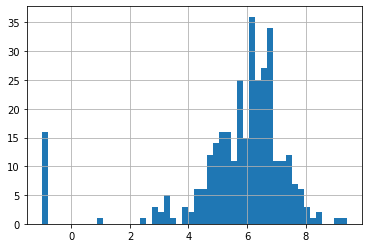

In [48]:
rus_film['ratings'].hist(bins=50)
plt.show()

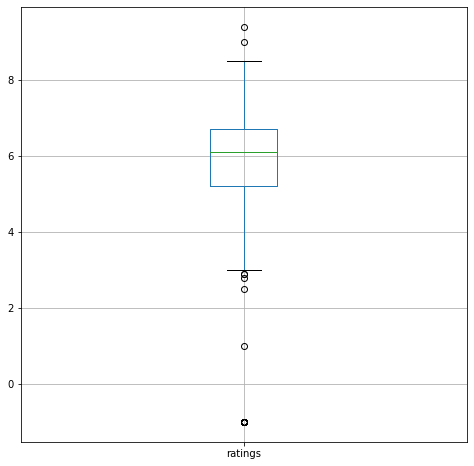

In [49]:
rus_film.boxplot('ratings', figsize=(8,8))
plt.show()

По графикам видим, что в основном разброс оценок фильмов с гос.поддержкой находится в диапазоне 5-7/10.

In [50]:
print(rus_film['budget'].corr(rus_film['ratings']))

0.11446997987144583


Нет никакой корреляции между суммой затрат на производство фильма и его оценкой среди зрителей - коэфициент корреляции всего 0.11

Посмотрим на статистику в зависимости от источника финансирования фильмов. 

In [51]:
rus_film.groupby('financing_source').count()

title  puNumber  show_start_date  type  \
financing_source                                                           
Министерство культуры               164       164              164   164   
Министерство культуры, Фонд кино     22        22               22    22   
Фонд кино                           146       146              146   146   

                                  film_studio  production_country  director  \
financing_source                                                              
Министерство культуры                     164                 164       164   
Министерство культуры, Фонд кино           22                  22        22   
Фонд кино                                 146                 146       146   

                                  producer  age_restriction  \
financing_source                                              
Министерство культуры                  164              164   
Министерство культуры, Фонд кино        22               22   
Фонд кино                              146              146   

                                  refundable_support  nonrefundable_support  \
financing_source                                                              
Министерство культуры                            164                    164   
Министерство культуры, Фонд кино                  22                     22   
Фонд кино                                        146                    146   

                                  budget  ratings  genres  box_office  \
financing_source                                                        
Министерство культуры                164      164     164         152   
Министерство культуры, Фонд кино      22       22      22          22   
Фонд кино                            146      146     146         144   

                                  start_year  main_genre  main_director  \
financing_source                                                          
Министерство культуры                    164         164            164   
Министерство культуры, Фонд кино          22          22             22   
Фонд кино                                146         146            146   

                                  support_ratio  
financing_source                                 
Министерство культуры                       164  
Министерство культуры, Фонд кино             22  
Фонд кино                                   146

В целом Министерство культуры и Фонд кино проспонсировало похожее число фильмов - 164 и 146 соответственно. 

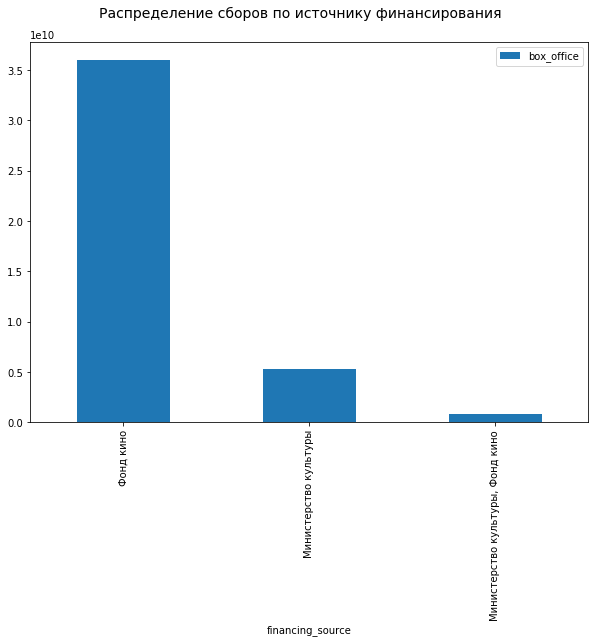

In [52]:
rus_film.groupby('financing_source').agg({'box_office':'sum'}).sort_values(by='box_office', ascending=False).plot(kind='bar', figsize=(10, 7))
plt.suptitle('Распределение сборов по источнику финансирования', size=14, y=0.95); 
plt.show()

Из этой гистрограммы мы отчетливо видим, что фильмы спонсируемые Фондом кино зарабатывают значительно больше, чем фильмы спонсируемые Министерством культуры - почти в 7 раз 

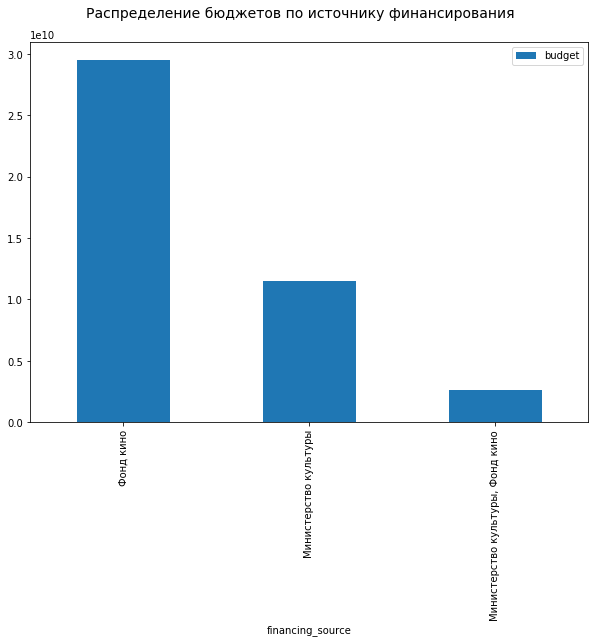

In [53]:
rus_film.groupby('financing_source').agg({'budget':'sum'}).sort_values(by='budget', ascending=False).plot(kind='bar', figsize=(10, 7))
plt.suptitle('Распределение бюджетов по источнику финансирования', size=14, y=0.95); 
plt.show()

При этом разница на затраты производства фильмов не такая большая - по графику Министерство культуры тратит в два раза меньше Фонда кино 

Построим графики с бюджетом и сборами в прокате фильмов спонсируемых Фондом кино с 2014 по 2019 годы

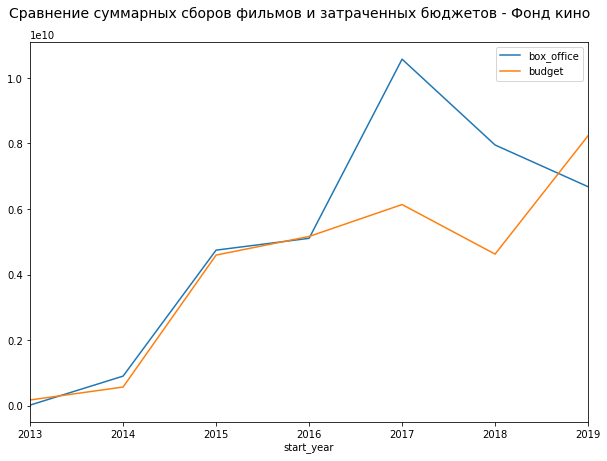

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
box_office_1 = rus_film.query('financing_source == "Фонд кино"').groupby(['start_year']).agg({'box_office': 'sum'}).plot(figsize=(10, 7), ax=ax)
budget_rus_1 = rus_film.query('financing_source == "Фонд кино"').groupby(['start_year']).agg({'budget': 'sum'}).plot(figsize=(10, 7), ax=ax)
plt.suptitle('Сравнение суммарных сборов фильмов и затраченных бюджетов - Фонд кино', size=14, y=0.95); 

Видим, что, в целом, такие фильмы окупают затраты на производство, лишь в 2019 бюджет превысил сборы в прокате. 

Проведем аналогичный анализ для фильмов спонсируемых Министерством культуры.

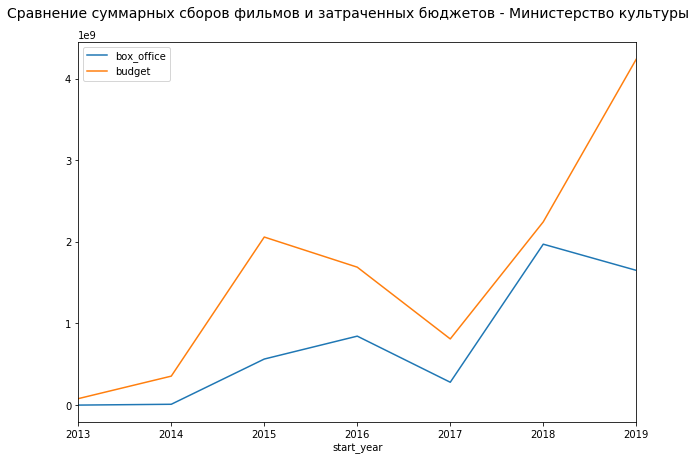

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
box_office_1 = rus_film.query('financing_source == "Министерство культуры"').groupby(['start_year']).agg({'box_office': 'sum'}).plot(figsize=(10, 7), ax=ax)
budget_rus_1 = rus_film.query('financing_source == "Министерство культуры"').groupby(['start_year']).agg({'budget': 'sum'}).plot(figsize=(10, 7), ax=ax)
plt.suptitle('Сравнение суммарных сборов фильмов и затраченных бюджетов - Министерство культуры', size=14, y=0.95); 

Эти фильмы однозначно убыточны

Сравним размер возвратной и невозвратной гос.поддержки

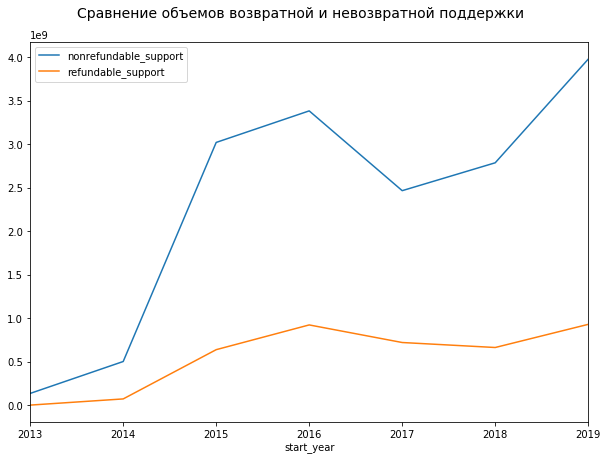

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
nonrefundable_support = rus_film.groupby(['start_year']).agg({'nonrefundable_support': 'sum'}).plot(figsize=(10, 7), ax=ax)
refundable_support = rus_film.groupby(['start_year']).agg({'refundable_support': 'sum'}).plot(figsize=(10, 7), ax=ax)
plt.suptitle('Сравнение объемов возвратной и невозвратной поддержки', size=14, y=0.95); 

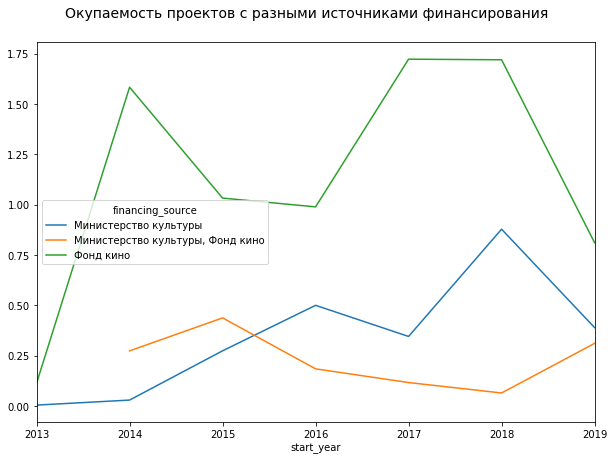

In [57]:
t1 = rus_film.pivot_table(index='start_year', columns='financing_source', values='budget', 
                     aggfunc='sum')
t2 = rus_film.pivot_table(index='start_year', columns='financing_source', values='box_office',
                     aggfunc='sum')
t2.div(t1).plot(figsize=(10, 7))
plt.suptitle('Окупаемость проектов с разными источниками финансирования', size=14, y=0.95); 

Размер невозвратной поддержки значительно превышает размер возвратных средств - можно снимать фильмы, на которые мало кто захочет пойти в кино и не возвращать деньги. 

## Общий вывод

1. Мы провели подготовку данных для исследования проката фильмов, объединили данные в один датафрейм, обработали пропуски и дупликаты, изучили и исправили все количественные и категориальные значения, изменили типы данных оптимизировав датафрейм
2. Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка - для большей части фильмов размер поддержки составляет от 0.4 до 0.6 от общего бюджета фильма.
3. Определили количество фильмов, выходивших каждый год. Максимальное количество фильмов пришлось на 2019 год, минимальное - на 2017. При этом суммы прокатных сборов имели наибольшее значение в 2018 году,  а минимальная в 2015.
4. За период 2015-2019 больше всего собрали фильмы с возрастным рейтингом 16+ - 76 млрд.руб, меньше всего - фильмы с возрастным рейтингом 18+ - 42 млрд.руб. Для фильмов 16+ и 18+ видим рост по сборам и пик в 2017 году, в то время как фильмы 12+ в 2017 году имеют значительный провал по отношению к другим возрастным категориям. Наименее выгодны показы с возрастным ограничием 18+, скорее всего связано с невозможностью допуска к просмотру лиц не достигших 18 лет, в то время, как, например, на фильмы 12+ возможен допуск детей 6+ в присутствии родителей. 
5. Фильмы с гос. поддержкой в целом не окупают себя, только в 2017 и 2018 годах сумма сборов превысила потраченные на производство фильмов бюджеты, разброс оценок фильмов с гос.поддержкой находится в диапазоне 5-7/10. Нет никакой корреляции между суммой затрат на производство фильма и его оценкой среди зрителей - коэфициент корреляции всего 0.11. В целом Министерство культуры и Фонд кино проспонсировало похожее число фильмов - 164 и 146 соответственно. 
6. Фильмы спонсируемые Фондом кино зарабатывают значительно больше, чем фильмы спонсируемые Министерством культуры - почти в 7 раз. При этом разница на затраты производства фильмов не такая большая - по графику Министерство культуры тратит в два раза меньше Фонда кино. Размер невозвратной поддержки значительно превышает размер возвратных средств
